<a href="https://colab.research.google.com/github/shaikhmyousuf/Cranfield_IRP/blob/main/Fusion%20CFZ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

#Initialise MSE data

In [2]:
#----------RADAR----------------------------------------------------------------
mse_RAD = [0.41010252889432897,
                    0.4161440209716934,
                    0.36339810280645773,
                    0.46191414890026405,
                    0.604803947019545,
                    0.9994516476146993,
                    0.6237980719761205,
                    0.45977154754549643,
                    0.2096115235700599,
                    0.5634793945979734,
                    0.4015790196960131,
                    0.4713770476588093,
                    0.620433366423667,
                    0.3040854006440342,
                    0.5220594974601303,
                    0.3038289881108873,
                    0.3176237379911885,
                    0.4087384094378658,
                    0.30954708738751663,
                    0.5012292042472543,
                    0.5209819680318155,
                    0.4022004514628954,
                    0.31217483648984984,
                    0.3633981251141764,
                    0.5621392364559654,
                    0.4147368943951261,
                    0.36485328788399896]
max_mse_RAD = 0.7234516009666163
threshold_rad = 0.5808492427983976

#----------RGB CAMERA-----------------------------------------------------------
mse_RGB=[0.005328842398807087,
         0.016762013262692076,
         0.010494582987116101,
         0.005765610502607128,
         0.009276614787829505,
         0.007849554552702045,
         0.016567334050253547,
         0.005345387064925247,
         0.005348162209670203,
         0.005372342869879088,
         0.005377991406778565,
         0.00537410331359537,
         0.005371504259764689,
         0.005378886008084696,
         0.005354739742805172,
         0.005379370381179952,
         0.005336661917076691,
         0.005319354249839369,
         0.00530687751328259,
         0.005293178855130562,
         0.005308022179114636,
         0.005325779829494892,
         0.005308739902532786,
         0.005354844945058309,
         0.005449224454281245,
         0.0046155077979903765,
         0.004646542313665604]

max_mse_RGB = 0.006013493077396178
threshold_rgb = 0.006207476290492044

In [3]:
mse_rad = np.asarray(mse_RAD)
mse_rad /= max_mse_RAD
threshold_rad /= max_mse_RAD 

mse_rgb = np.asarray(mse_RGB)
mse_rgb /= max_mse_RGB
threshold_rgb /= max_mse_RGB 

#Fusion of thresholds tested

In [4]:
print(threshold_rad)
print(threshold_rgb)

0.8028861115550988
1.0322579922516282


In [61]:
weight_rgb = 0.4 #.35
weight_rad = 0.6 #.65
threshold_cfz = (weight_rgb*threshold_rgb) + (weight_rad*threshold_rad)
print(threshold_cfz)

0.8946348638337105


#Fusion of MSEs

In [62]:
mse_cfz = (mse_rgb*weight_rgb) + (mse_rad*weight_rad)
mse_cfz

array([0.69458064, 1.46009234, 0.99945595, 0.76660353, 1.11865201,
       1.35103215, 1.61936228, 0.73687451, 0.52958702, 0.82467841,
       0.69078085, 0.74840974, 0.87185783, 0.60998329, 0.7891556 ,
       0.60980286, 0.61840279, 0.69281817, 0.60972319, 0.76778499,
       0.78515443, 0.68782328, 0.61202641, 0.6575756 , 0.82868088,
       0.65097525, 0.61166823])

In [63]:
mse_cfz.shape

(27,)

In [64]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

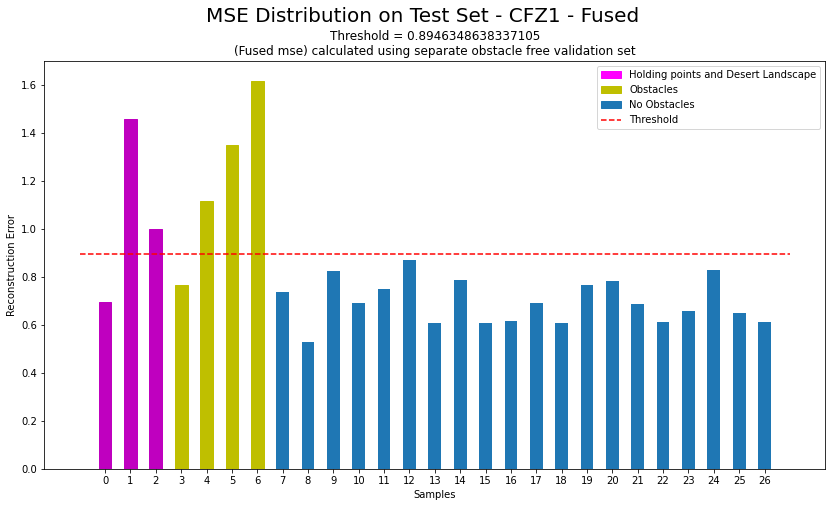

In [65]:
x= range(27)
y= mse_cfz
fig, ax = plt.subplots(figsize=(14, 7.5))
barlist = plt.bar(x,y, width=0.5)
barlist[0].set_color('m')
barlist[1].set_color('m')
barlist[2].set_color('m')
barlist[3].set_color('y')
barlist[4].set_color('y')
barlist[5].set_color('y')
barlist[6].set_color('y')
# barlist[7].set_color('y')
# barlist[8].set_color('y')
plt.hlines(threshold_cfz,-1,27,color='red', linestyle='--')

#Title and axes
plt.suptitle('MSE Distribution on Test Set - CFZ1 - Fused', fontsize = 20)
plt.title('Threshold = '+str(threshold_cfz)+'\n'+'(Fused mse) calculated using separate obstacle free validation set')
plt.xlabel('Samples', fontsize = 10)
plt.ylabel('Reconstruction Error',fontsize = 10)
plt.yticks(fontsize = 10)
plt.xticks(range(27),fontsize = 10)

#Legend
handles, labels = plt.gca().get_legend_handles_labels()
blue_patch = mpatches.Patch(color='tab:blue',label='No Obstacles')
yellow_patch = mpatches.Patch(color='y',label='Obstacles')
mag_patch = mpatches.Patch(color='magenta',label='Holding points and Desert Landscape')
line = Line2D([0],[0], label='Threshold',color='r',linestyle='--')
handles.extend([mag_patch, yellow_patch,blue_patch,line])
plt.legend(handles=handles)

plt.show()



In [66]:
true_action_list = []
for k in range(27):
    if (2<k<7):
      action = 'stop'
    else:
      action = "go"
    true_action_list.append(action)
true_action_list

['go',
 'go',
 'go',
 'stop',
 'stop',
 'stop',
 'stop',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go']

In [67]:
action_cfz = []
for i in range(27):
  if mse_cfz[i] > threshold_cfz:
    action = 'stop'
  else:
    action = 'go'
  action_cfz.append(action)
action_cfz

['go',
 'stop',
 'stop',
 'go',
 'stop',
 'stop',
 'stop',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go']

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

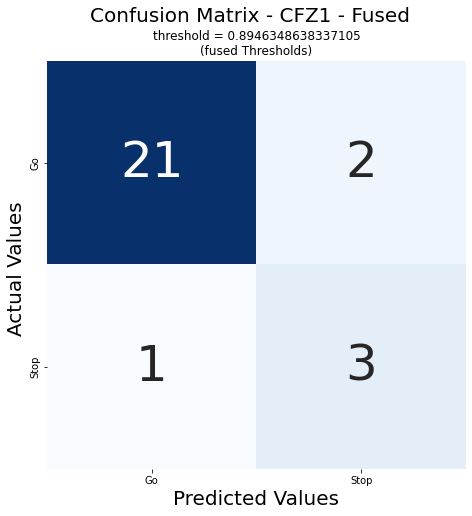

In [69]:
cm = confusion_matrix(true_action_list, action_cfz)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
fx = sns.heatmap(cm, annot=True, cmap='Blues',cbar=False, annot_kws={'fontsize':50})

# labels the title and x, y axis of plot
plt.suptitle('Confusion Matrix - CFZ1 - Fused', fontsize = 20)
plt.title('threshold = '+str(threshold_cfz)+'\n'+'(fused Thresholds)')

# fx.set_xlabel('Predicted Values', )
plt.xlabel('Predicted Values', fontsize = 20)
plt.ylabel('Actual Values ', fontsize = 20);

# labels the boxes
fx.xaxis.set_ticklabels(['Go','Stop'])
fx.yaxis.set_ticklabels(['Go','Stop'])


plt.show()

#ROC - AUC - An attempt